# Small System of Linear Equations

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

## Orthogonal transformations
Let us test the orthogonal transformations, about which we learn something this morning.
We have $n$ vectors stored in a matrix $A$. 

### Gram-Schmidt orthogonalization

EXERCISE: Implement the Gram-Schmidt orthogonalization.


In [2]:
def gram_schmidt(A):
    n = A.shape[0]
    Q = np.empty_like(A)
    Q[:, 0] = A[:, 0] / la.norm(A[:, 0])

    for j in range(1, n):
        v = A[:, j] - np.sum(np.dot(Q[:, i], A[:, j]) * Q[:, i] for i in range(j))
        Q[:, j] = v / la.norm(v)

    return Q

In [3]:
# https://math.science.cmu.ac.th/thaned/Amath789/Docs/StevenLeon_LAwithApps_ver8.pdf
# https://raw.githubusercontent.com/stevenmwise/ClassicalNumericalAnalysis/refs/heads/main/codes/Chapter05/ModifiedGramSchmidt.m
# https://raw.githubusercontent.com/stevenmwise/ClassicalNumericalAnalysis/refs/heads/main/codes/Chapter05/ClassicalGramSchmidt.m
# https://www.youtube.com/watch?v=FAnNBw7d0vg

Let's test our function:    

In [4]:
a1 = np.array([1, 1 / 2, 1 / 3])
a2 = np.array([1 / 2, 1 / 3, 1 / 4])
a3 = np.array([1 / 3, 1 / 4, 1 / 5])
A = np.column_stack([a1, a2, a3])
Q = gram_schmidt(A)
print(Q)
error_gs = np.max(np.abs(Q @ Q.T - np.eye(3)))
print("Q@Q.T == I?", np.all(np.abs(Q @ Q.T - np.eye(3)) < 1e-10))
print(" The error is ", error_gs)

[[ 0.85714286 -0.50160492  0.11704115]
 [ 0.42857143  0.56848557 -0.70224688]
 [ 0.28571429  0.65208639  0.70224688]]
Q@Q.T == I? True
 The error is  6.161737786669619e-14


/tmp/ipykernel_122528/736698270.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  v = A[:, j] - np.sum(np.dot(Q[:, i], A[:, j]) * Q[:, i] for i in range(j))


In [5]:
# Create a random matrix
n = 5
A = np.random.random((n, n))

Q = gram_schmidt(A)
# Q, R = la.qr(A)
error_gs = np.max(np.abs(Q @ Q.T - np.eye(n)))
print("Q@Q.T == I?", np.all(np.abs(Q @ Q.T - np.eye(n)) < 1e-10))
print(" The error is ", error_gs)

Q@Q.T == I? True
 The error is  7.771561172376096e-16


/tmp/ipykernel_122528/736698270.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  v = A[:, j] - np.sum(np.dot(Q[:, i], A[:, j]) * Q[:, i] for i in range(j))


Oh, nice! The error is small enough. So what's the problem?


The functions $$f_k(x) = {\sin( (k+1)/k\cdot  x)}\qquad k \in {1,\dots, n} $$ are linearly independent. We discretize them on the interval [0, 1] with $x_i = i/n $ for $ i \in {1,\dots, n}$.    

EXERCISE: Implemtent these functions, such they are returned as a matrix $ A[k,i] = f_k(x_i)$ .

In [6]:
def almost_colinear_matrix(n):
    A = np.zeros((n, n))
    # HERE your code
    return A

Let's take a look at these functions:

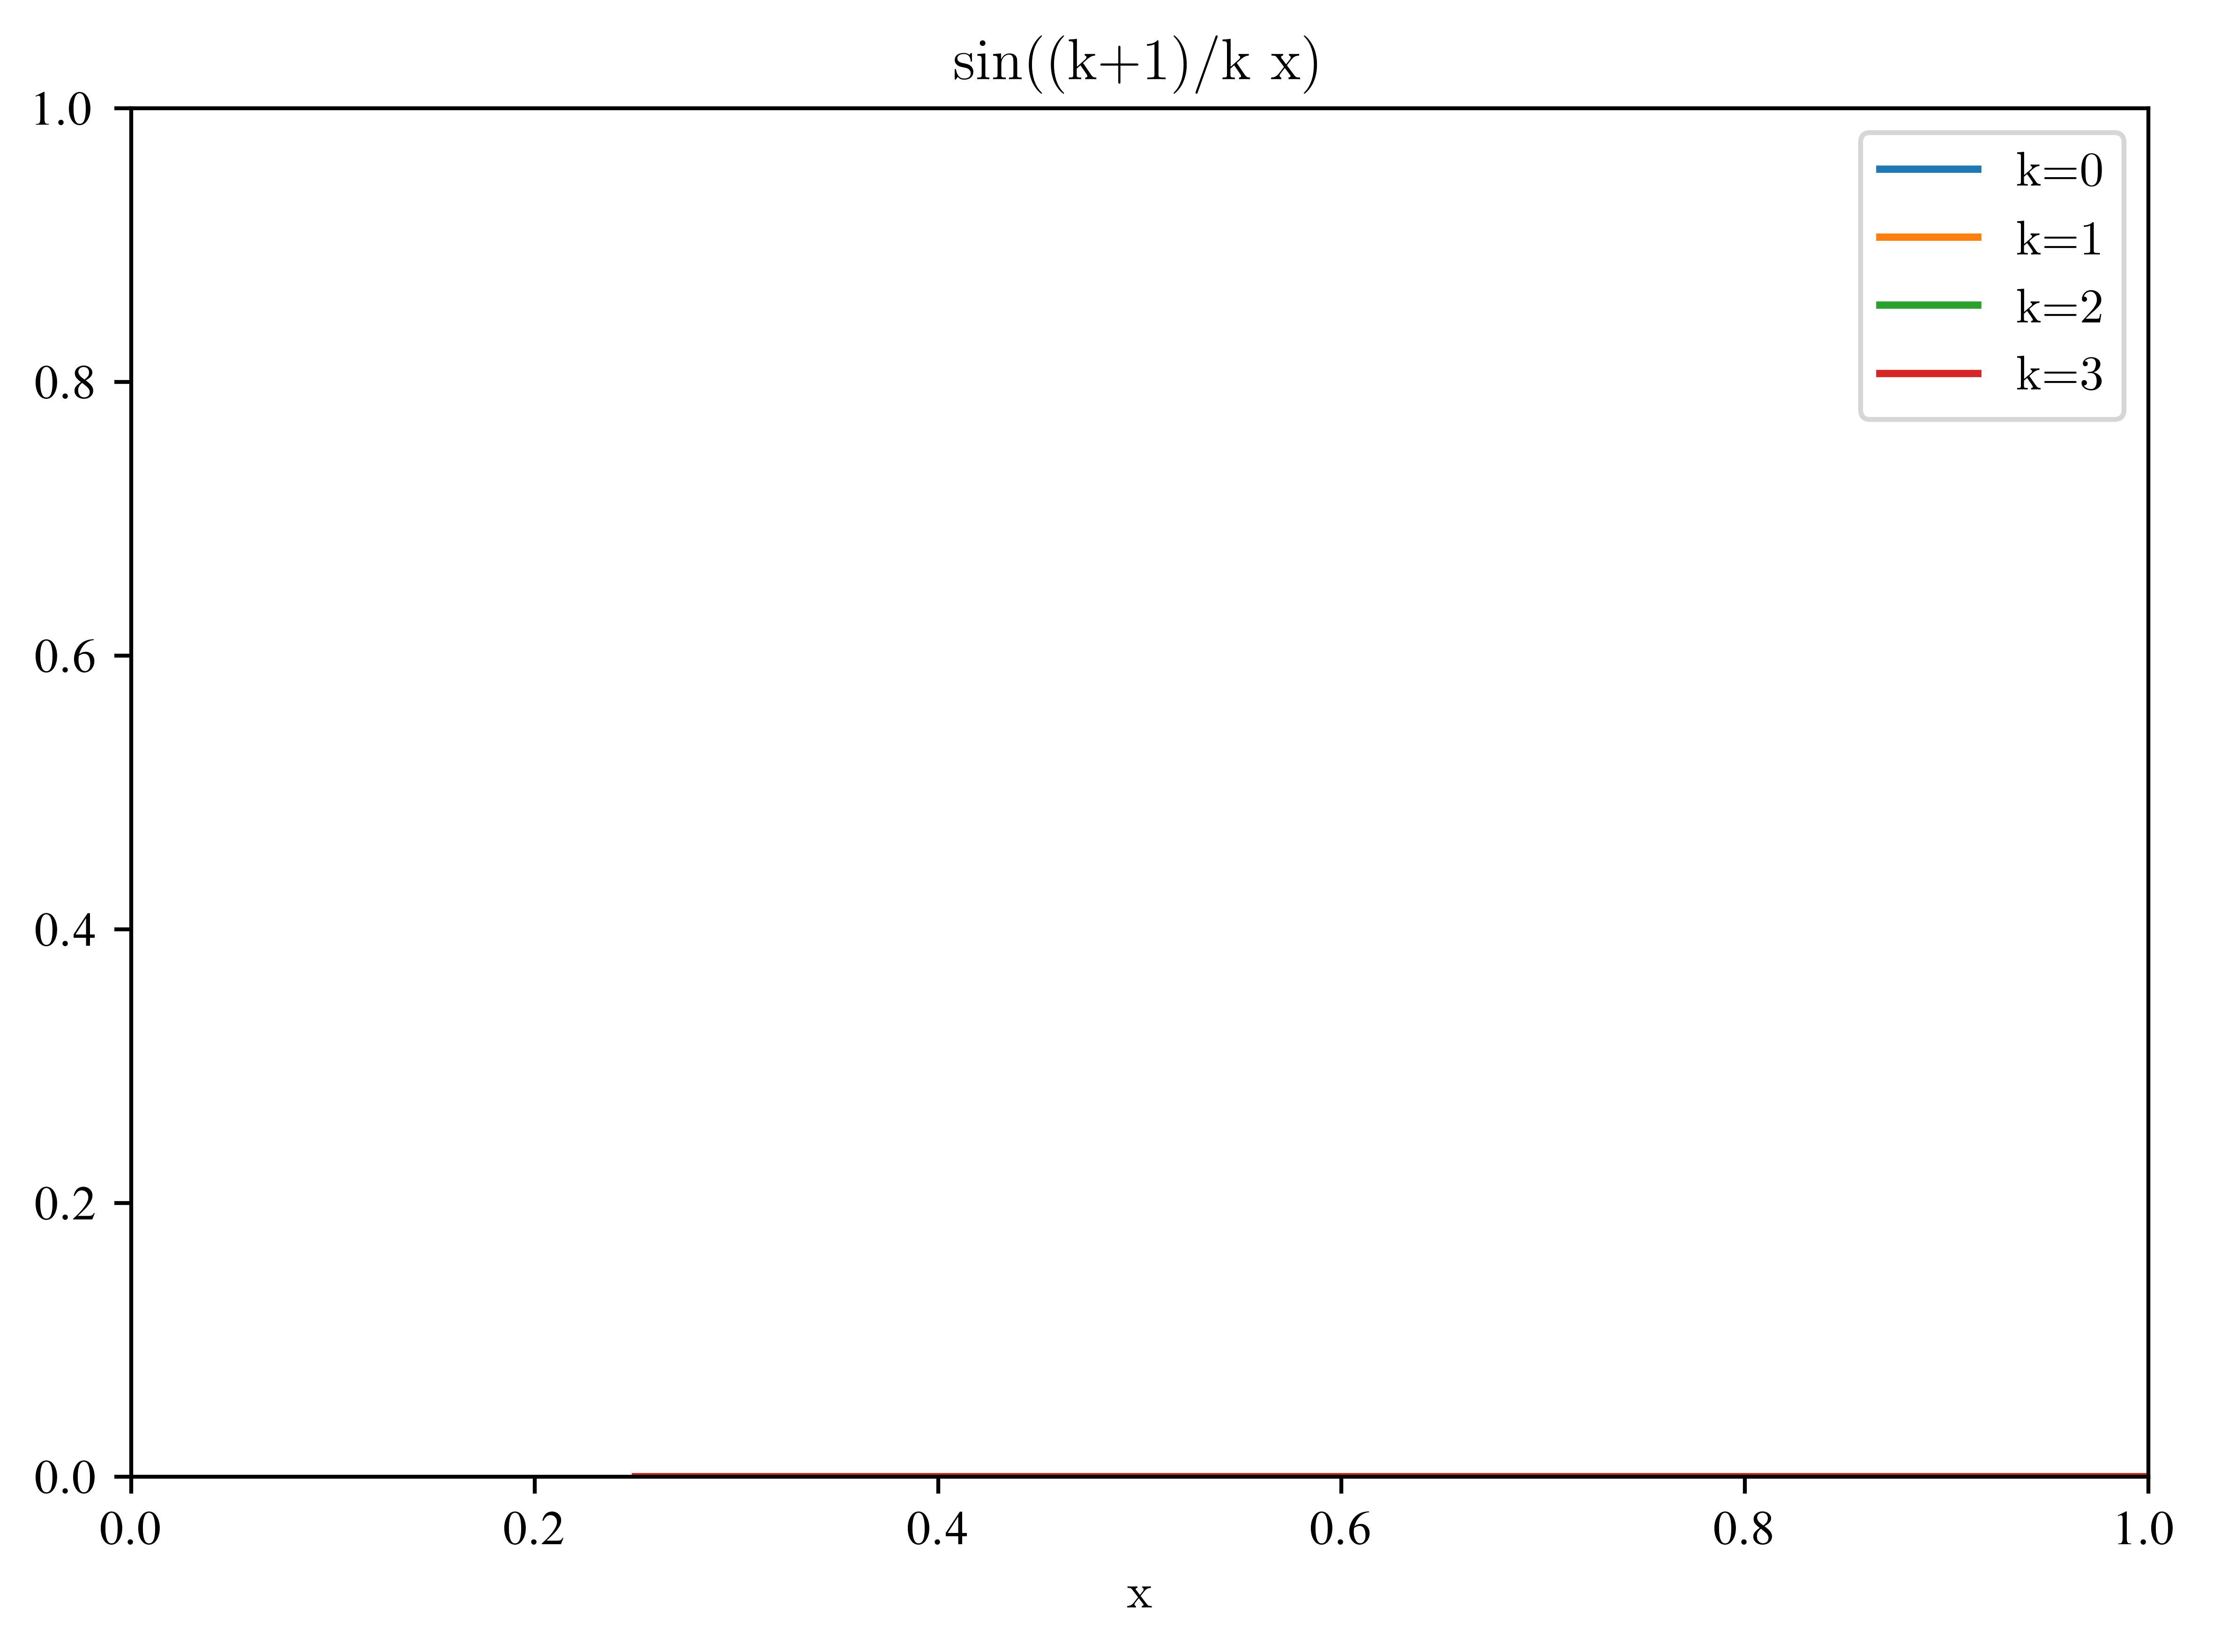

In [7]:
n = 4
x = np.arange(1, n + 1) / n
A = almost_colinear_matrix(n)

for k in range(n):
    plt.plot(x, A[k, :], label="k={}".format(k))
plt.title("sin((k+1)/k x)")
plt.xlabel("x")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

In [8]:
n = 5
A = almost_colinear_matrix(n)

Q = gram_schmidt(A)
error_gs = np.max(np.abs(Q @ Q.T - np.eye(n)))
print("Q@Q.T == I?", np.all(np.abs(Q @ Q.T - np.eye(n)) < 1e-10))
print(" The error is ", error_gs)

Q@Q.T == I? False
 The error is  nan


/tmp/ipykernel_122528/736698270.py:4: RuntimeWarning: invalid value encountered in divide
  Q[:, 0] = A[:, 0] / la.norm(A[:, 0])
/tmp/ipykernel_122528/736698270.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  v = A[:, j] - np.sum(np.dot(Q[:, i], A[:, j]) * Q[:, i] for i in range(j))


Oh, no! We had only five dimensions...

### Modified Gram-Schmidt
Let us reduce the error, by implementing the Modified Gram-Schmidt method.

In [9]:
def mod_gram_schmidt(A):
    n = A.shape[0]
    Q = A.copy()

    return Q

Let's check the implementation: 

In [10]:
n = 5

# first, using a "good" matrix
print("good Matrix:")
A = np.random.random((n, n))

Q = mod_gram_schmidt(A)
error_gs = np.max(np.abs(Q @ Q.T - np.eye(n)))
print("Q@Q.T == I?", np.all(np.abs(Q @ Q.T - np.eye(n)) < 1e-10))
print(" The error is ", error_gs)


print("\ncolinear Matrix:")
A = almost_colinear_matrix(n)
Q = mod_gram_schmidt(A)
error_gs = np.max(np.abs(Q @ Q.T - np.eye(n)))
print("Q@Q.T == I?", np.all(np.abs(Q @ Q.T - np.eye(n)) < 1e-10))
print(" The error is ", error_gs)

good Matrix:
Q@Q.T == I? False
 The error is  1.6205773558537144

colinear Matrix:
Q@Q.T == I? False
 The error is  1.0


Nice! It's better than Gram-Schmidt. But larger n, the error increases rapidly (try it out). Let's use the matrix of the lecture.

In [11]:
def hilbert_matrix(n):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = 1 / (i + j + 1)
    return A

In [12]:
n = 9
A = hilbert_matrix(n)

Q = mod_gram_schmidt(A)
error_gs = np.max(np.abs(Q @ Q.T - np.eye(n)))
print("Q@Q.T == I?", np.all(np.abs(Q @ Q.T - np.eye(n)) < 1e-10))
print(" The error is ", error_gs)

Q@Q.T == I? False
 The error is  0.9396153110967512


Not what'd like to see, or?



$sign(v_1)$ is the sign of the first component. In the case, $v_1=0$ we choose sign=1. We calculate: $$ v_1 = v_1 + sign(v_1) \|v\|_2 $$
and  

$$Q_v = Id - 2 \cdot \frac{v v^T}{v^Tv} = Id -2 w w^T, $$

where $w = v/|v\|_2$.   


### Householder reflection
Recall from the lecture this morning:  
$sign(v_1)$ is the sign of the first component. In the case, $v_1=0$ we choose sign=1. We calculate: $$ v_1 = v_1 + sign(v_1) \|v\|_2 $$
and  

$$Q_v = Id - 2 \cdot \frac{v v^T}{v^Tv} = Id -2 w w^T, $$

where $w = v/|v\|_2$.   
The new entry of the diagonal will be $\alpha =  sign(v_1) \|v\|_2$



EXERCISE: Complete the function, that creates the Householder Matrix.


In [13]:
def Householder_matrix(v, return_diag_entry=False):
    # Create Matrix Q_v as described above.
    # INPUT: v 1d-array or 2d-array with one column or one row
    # OUPUT: Q Householdermatrix of v, if return_diag_entry is set, it returns alpha.

    v = v.copy()  # do not overwrite original matrix
    n = len(v)
    v = v.reshape(
        (n)
    )  # reshape, because tensorprod gives different results for (n) and (n,1) dimension
    diag_entry = 0

    # HERE your code

    if return_diag_entry:
        return Q, diag_entry
    return Q

Now check, if the Householder Matrix has the right properties:
$$Q=Q^*=Q^{-1} $$
and
$$ Qv = \beta e_1$$ 
for some $\beta \in \mathbb{R}$.   
EXERCISE: Test your implementation.

## QR decomposition


In [14]:
def QR_decomposition(A):
    n = A.shape[0]
    Q = np.eye(n)
    R = A.copy()
    return Q, R

/usr/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


A == QR? True


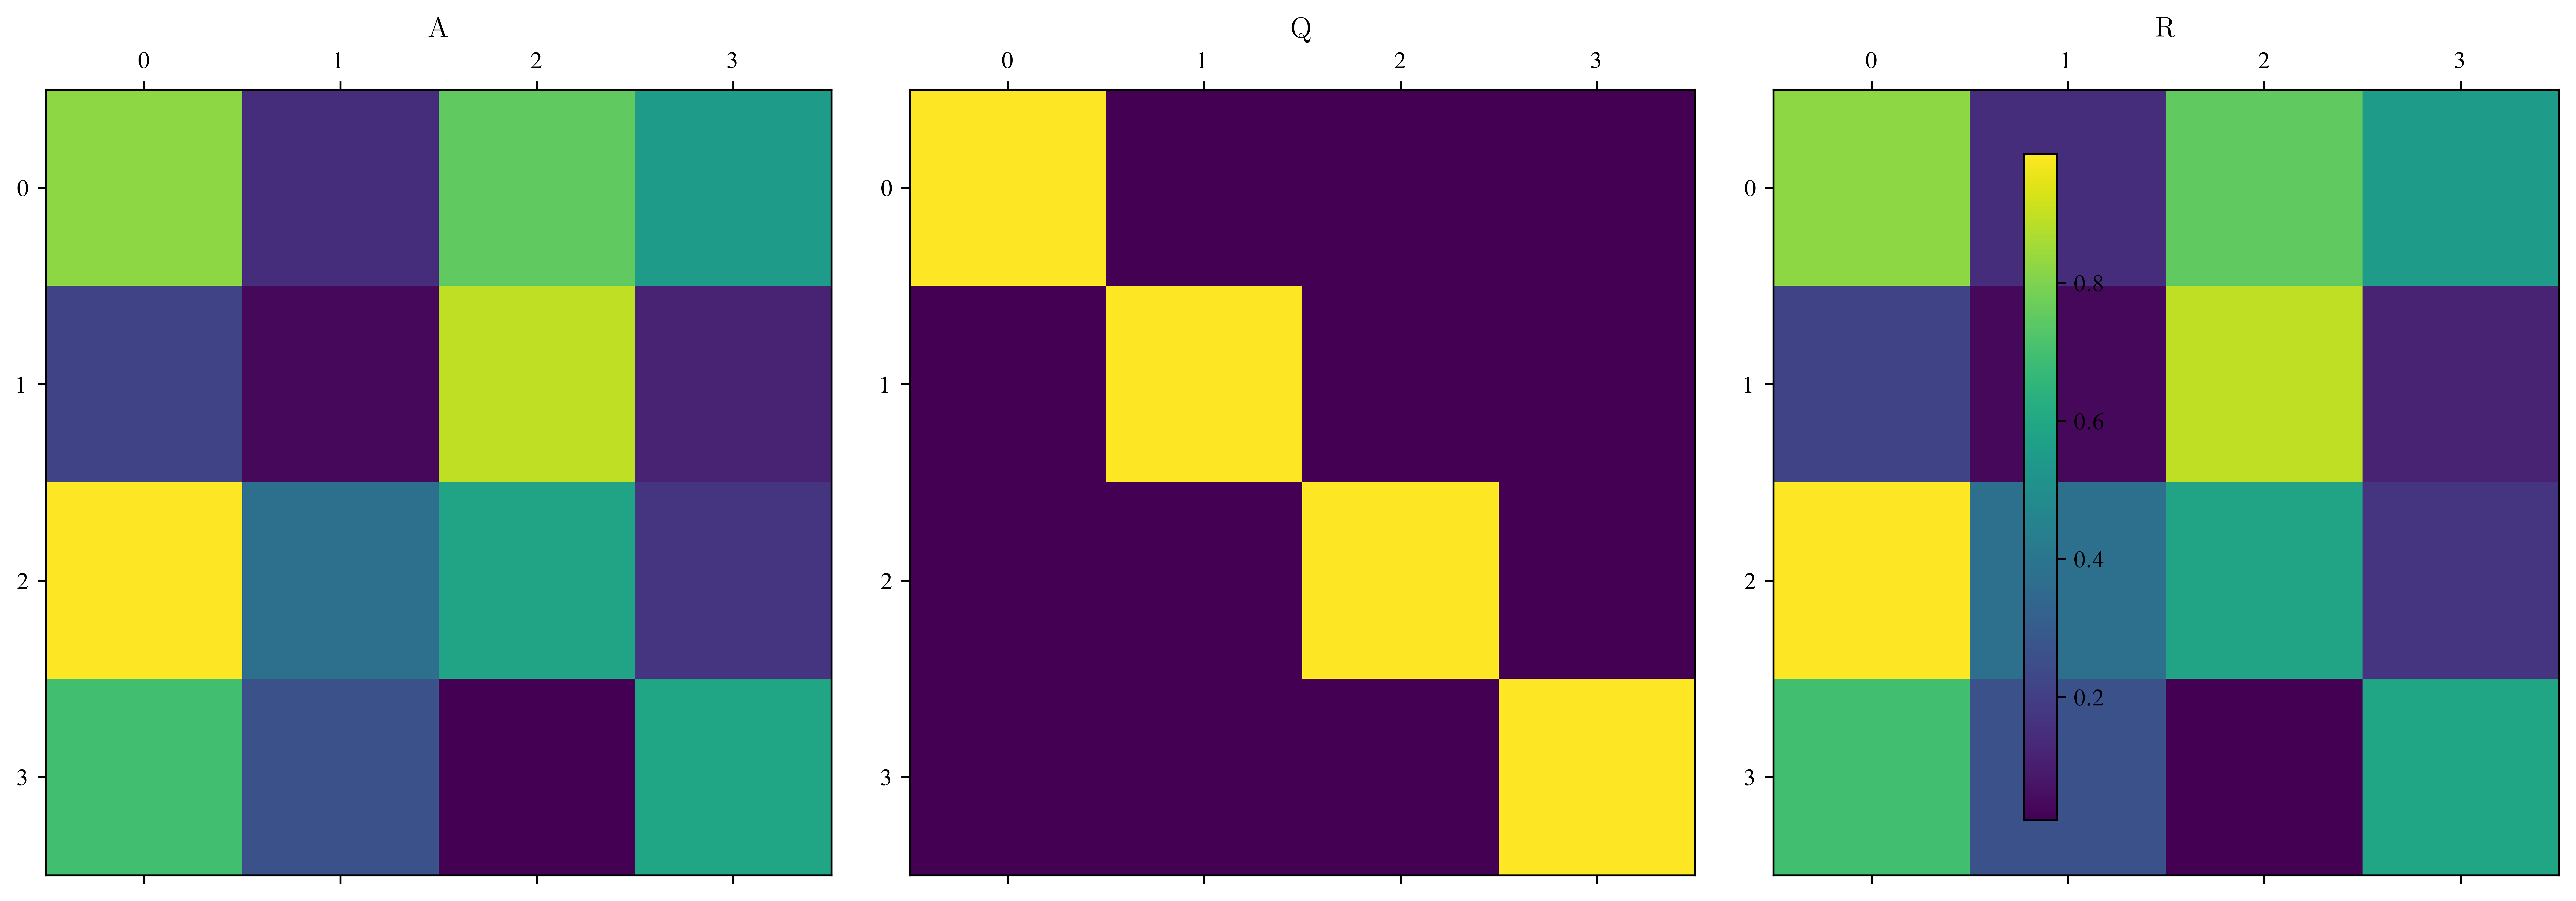

In [15]:
A = np.random.random((4, 4))

Q, R = QR_decomposition(A.copy())
print("A == QR?", np.all(np.abs(A - Q @ R) < 1e-10))
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
im = ax[0].matshow(A)
ax[0].set_title("A")
ax[1].matshow(Q)
ax[1].set_title("Q")
ax[2].matshow(R)
ax[2].set_title("R")
fig.colorbar(im, ax=ax)
plt.show()

Now let's check our "bad guys":

In [16]:
n = 100

print("Random Matrix:")
A = np.random.random((n, n))
Q, R = QR_decomposition(A)
error_hh = np.max(np.abs(Q @ Q.T - np.eye(n)))
print("Q@Q.T == I?", np.all(np.abs(Q @ Q.T - np.eye(n)) < 1e-10))
print(" The error is ", error_hh)

print("\ncolinear Matrix:")
A = almost_colinear_matrix(n)
Q, R = QR_decomposition(A)
error_hh = np.max(np.abs(Q @ Q.T - np.eye(n)))
print("Q@Q.T == I?", np.all(np.abs(Q @ Q.T - np.eye(n)) < 1e-10))
print(" The error is ", error_hh)

print("\nHilbert Matrix:")
A = hilbert_matrix(n)
Q, R = QR_decomposition(A)
error_hh = np.max(np.abs(Q @ Q.T - np.eye(n)))
print("Q@Q.T == I?", np.all(np.abs(Q @ Q.T - np.eye(n)) < 1e-10))
print(" The error is ", error_hh)

Random Matrix:
Q@Q.T == I? True
 The error is  0.0

colinear Matrix:
Q@Q.T == I? True
 The error is  0.0

Hilbert Matrix:
Q@Q.T == I? True
 The error is  0.0


Wonderful!

## Solving linear systems

Let's have a rectangular system:
$$Ax=b$$
Finding the least solution is equivalent to $(A=QR)$
$$ Rx =Q^Tb \qquad \Leftrightarrow  \qquad A^TAx = A^Tb$$

Because $R$ is an upper triangular matrix, we need the backward substitution.

In [17]:
def backward_substitution(U, b):
    n = U.shape[1]
    # This is needed for rectangular R
    if U.shape[0] != n:
        U = U[:n, :n]
        b = b[:n]

    x = np.zeros(n)
    # first step, lower right corner
    x[-1] = b[-1] / U[-1, -1]
    # now backward substitution
    for i in range(n - 2, -1, -1):
        x[i] = (b[i] - U[i, i + 1 :] @ x[i + 1 :]) / U[i, i]
    return x

Our last step is to compare our implementation to solution by python.
We will compare this by 
1. the Solution of the normal system $A^TAx = A^Tb$, which is going to be solved as a system of linear equations.
2. the Minimum of $\| Ax-b \|$

In [18]:
n = 6
m = 3
A = np.random.random((n, m))
b = np.random.random(n)

Q = np.eye(n)
R = A
x_QR = np.ones(m)

# Min via QR

# HERE your code


# Min via normal equation
x_normal = np.linalg.solve(A.T @ A, A.T @ b)

# min via optimazation problem:
print("Least Squares Solution:")
from scipy.optimize import minimize

x_opt = minimize(lambda x: np.linalg.norm(A @ x - b), np.zeros(m)).x

print("normal\t\t", x_normal)
print("QR\t\t", x_QR)
print("optimization\t", x_opt)
print("Residual", np.linalg.norm(A @ x_opt - b))

Least Squares Solution:
normal		 [ 0.84060402 -0.20255282  0.54228001]
QR		 [1. 1. 1.]
optimization	 [ 0.84060398 -0.20255263  0.54227941]
Residual 0.5007372205791334


Now, we can solve rectangular systems:

## Advanced memory management
For large matrices, it's too slow to save Q and R in separate matrices (and store all the Zeros).  
Think about a memory optimized version.
Hints:
1. Do really need Q? Or only the vectors?
2. Which of the entries of the matrix can be overwritten?
3. Which matrices do need for the solution of which problem?

Try to implement some optimizations.


#### Solution
